In [1]:
from sklearn.linear_model import LinearRegression
import mglearn
import numpy as np

### Linear Regression Model
$y=\textbf{w}^{T}\textbf{x}+b$

- looks for $w$ and $x$ that minimize **Residual Sum of Square**
    - that's why it's called 'least-square'

In [2]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [3]:
print(X_train.shape,y_train.shape) # this data has 105 features
print(X_test.shape,y_test.shape)

(379, 104) (379,)
(127, 104) (127,)


In [4]:
lm = LinearRegression().fit(X_train, y_train)

In [1]:
print('Estimated coefficients:\n {}'.format(lm.coef_))
print('Estimated intercept is: {}'.format(lm.intercept_))

NameError: name 'lm' is not defined

In [19]:
print('Training data score: {:.2f}'.format(lm.score(X_train, y_train)))
print('Testing data score: {:.2f}'.format(lm.score(X_test, y_test)))
# testing data's score is way lower than traning, it may be overfitted

Training data score: 0.95
Testing data score: 0.61


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train, y_train, cv = 10)
print(scores)

[0.92641641 0.81170812 0.75894798 0.63354257 0.60553694 0.35697821
 0.80627801 0.88640764 0.91815195 0.93423711]


### Ridge Regression

- try to minimize parameters $w$ so that some attributes become insignificant
    - set model parameter 'alpha'
- better when generalizing

In [7]:
from sklearn.linear_model import Ridge

In [8]:
ridge = Ridge().fit(X_train, y_train) # default alpha = 1.0
print(ridge.coef_)
print(ridge.intercept_)

[-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805898e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31207081e+00  1.71845119e+00 -2.59766697e+00 -1.32370675e+00
 -2.81242223e+00 -2.09117

In [21]:
print("training score: {:.2f}".format(ridge.score(X_train,y_train)))
print('Test score: {:.2f}'.format(ridge.score(X_test, y_test)))
# eliminates the problem of overfitting

training score: 0.89
Test score: 0.75


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ridge(), X_train, y_train, cv = 10)
print(scores, '\n',scores.mean())

[0.88707536 0.83895238 0.48745518 0.84595671 0.82699695 0.93576731
 0.65795733 0.92714911 0.89577943 0.86735147] 
 0.8170441228505438


### Set alpha
Increase alpha --> parameters tend to 0 --> effect of attributes decreases --> accuracy on training decreases, but better at generalization

In [10]:
# set alpha = 10
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print("Training score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Testing score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training score: 0.79
Testing score: 0.64


In [11]:
# set alpha = 0.1
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print("Training score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Testing score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training score: 0.93
Testing score: 0.77


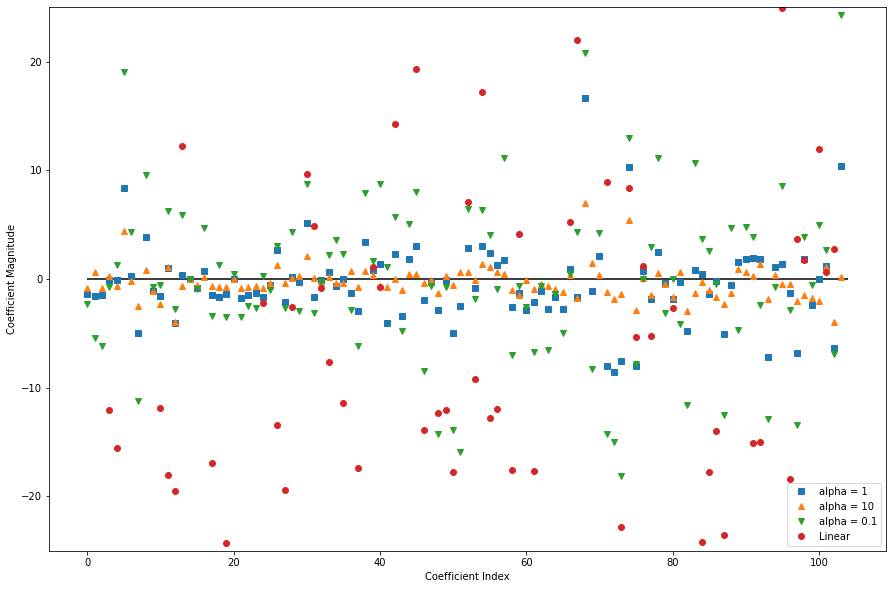

In [12]:
# compare estimated coefficients with different alpha
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.plot(ridge.coef_,'s',label = 'alpha = 1')
plt.plot(ridge10.coef_,'^',label = 'alpha = 10')
plt.plot(ridge01.coef_,'v',label = 'alpha = 0.1')

plt.plot(lm.coef_,'o',label = 'Linear') # actually, it's alpha = 0
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.hlines(0,0,len(lm.coef_))
plt.ylim(-25,25)
plt.legend()

# bigger the alpha, the thinner the tendency of coefficients

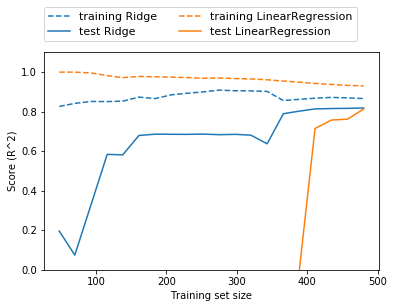

In [13]:
mglearn.plots.plot_ridge_n_samples()

### Lasso
- also makes parameters $w$ tend to zero, and ignores some attributes
- under-fitting may be a problem

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(lasso.coef_) # note that lots attributes are not used

[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.         -0. 

In [15]:
print('training score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('testing score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of attributes used: {}'.format(np.sum(lasso.coef_ != 0)))
# this is under-fitting

training score: 0.29
testing score: 0.21
Number of attributes used: 4


Tweak alpha for Lasso regression
- We want to decrease alpha so that we can include more attributes
- increase `max_iter` to increase number of iteration

In [16]:
lasso001 = Lasso(alpha = 0.01,max_iter = 100000).fit(X_train, y_train)
print('training score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('testing score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of attributes used: {}'.format(np.sum(lasso001.coef_ != 0)))
# now we used 33/155 attributes, but it worked way better

training score: 0.90
testing score: 0.77
Number of attributes used: 33


In [17]:
#it's still possible to have over-fitting if alpha is too low
lasso00001 = Lasso(alpha = 0.0001,max_iter = 100000).fit(X_train, y_train)
print('training score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('testing score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of attributes used: {}'.format(np.sum(lasso00001.coef_ != 0)))


training score: 0.95
testing score: 0.64
Number of attributes used: 96


Text(0, 0.5, 'Coefficient magnitude')

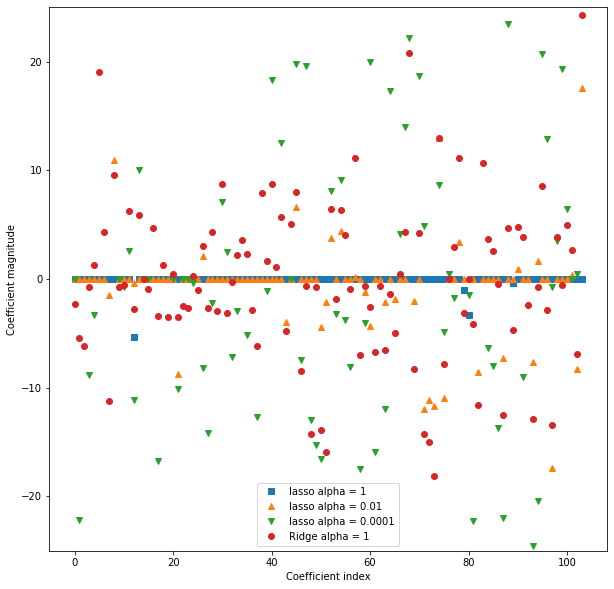

In [28]:
plt.figure(figsize=(10,10))
plt.plot(lasso.coef_,'s',label = 'lasso alpha = 1')
plt.plot(lasso001.coef_,'^',label = 'lasso alpha = 0.01')
plt.plot(lasso00001.coef_,'v',label = 'lasso alpha = 0.0001')
plt.plot(ridge01.coef_,'o',label = 'Ridge alpha = 1')

plt.legend()
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

In [30]:
cross_val_score(Lasso(),X_train,y_train,cv = 10)

array([0.32699549, 0.26366418, 0.35710145, 0.31565753, 0.19112297,
       0.30087823, 0.14467597, 0.23535092, 0.23985861, 0.33889579])